<a href="https://colab.research.google.com/github/rulogar1234/nuclio-1/blob/develop/1er_Entregable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#importamos librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px
from itertools import combinations

In [ ]:
#leemos el fichero de renfe
df_bmw1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/1stEntregable/bmw_pricing_v3.csv",sep=",")
df_bmw1.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


# **FECHAS**

In [ ]:
#convertimos las fechas
for i in ["fecha_registro","fecha_venta"]:
    df_bmw1[i]=pd.to_datetime(df_bmw1[i])

# **DUPLICADOS**

In [ ]:
#verificamos duplicados
df_bmw1[df_bmw1.duplicated(keep='first')]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


# **NEGATIVOS**

In [ ]:
#miramos que no hayan precios negativos o 0
df_bmw1[(df_bmw1['precio'] < 0)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [ ]:
df_bmw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

In [ ]:
#miramos los valores que tenemos en la marca
df_bmw1['marca'].unique()

array([nan, 'BMW'], dtype=object)

In [ ]:
#como la lista es de BMW, todos los coches suponemos que son BMW, borramos la columna
del df_bmw1['marca']

In [ ]:
#miramos cuantos registros tiene nuestro dataset
len(df_bmw1)

4843

# **OUTLAYERS**

modelo 
 320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64 

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
tipo_gasolina 
 diesel           4631
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64 

color 
 black     1499
grey      1070
blue       647
white      484
brown      302
silver     292
red         47
beige       37
green       14
orange       6
Name: color, dtype: int64 

tipo_coche 
 estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: tipo_coche, dtype: int64 

volante_regulable 
 True     2662
False    2177
Name: volante_regul

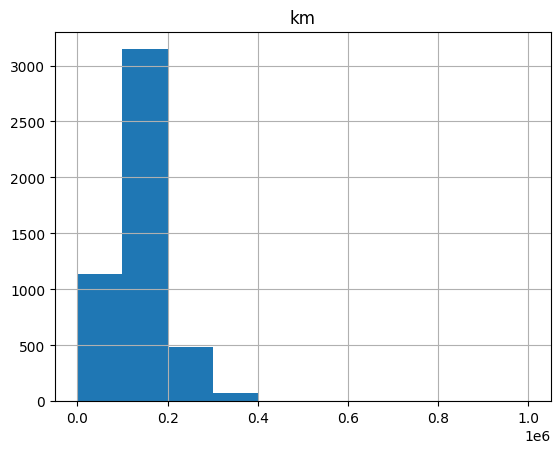

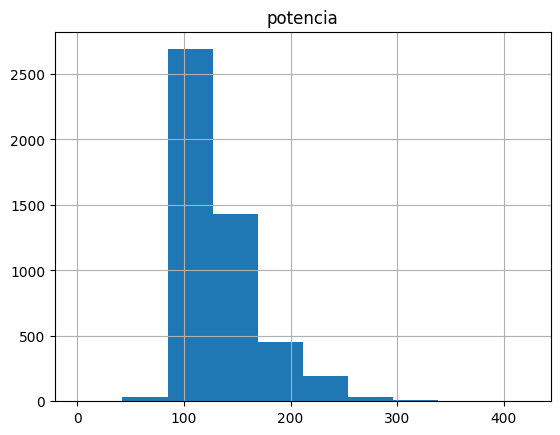

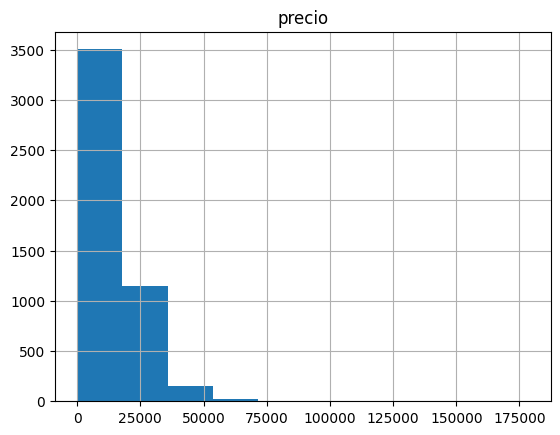

In [ ]:
#HACEMOS HISTOGRAMAS PARA DETECTAR POSIBLES OUTLAYERS
for i in df_bmw1:
  if df_bmw1[i].dtype.kind == "O":
    print(i,'\n', df_bmw1[i].value_counts(), '\n')
  elif (df_bmw1[i].dtype.kind=="f") or (df_bmw1[i].dtype.kind=="i"):
    print(df_bmw1.hist(i))

OUTLAYERS **NUMERICOS**

In [ ]:
#miramos cuantos coches hay más altos de 70000 de precio
df_bmw1[df_bmw1['precio'] > 70000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
90,i8,12402.0,170.0,NaT,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01
2938,640 Gran Coupé,-64.0,230.0,NaT,diesel,black,sedan,True,True,False,NaN,False,False,True,True,75000.0,2018-04-01
4146,X6 M,2970.0,423.0,2016-04-01,petrol,red,suv,True,NaN,True,False,False,False,True,True,82400.0,2018-04-01
4684,X4,103222.0,140.0,2014-08-01,diesel,grey,suv,True,True,False,NaN,True,False,True,True,142800.0,2018-08-01
4731,X5 M,4530.0,230.0,2016-07-01,diesel,silver,suv,True,NaN,False,NaN,False,False,False,True,73100.0,2018-08-01
4753,X3,72515.0,135.0,2013-03-01,diesel,blue,suv,False,False,True,NaN,False,NaN,False,True,178500.0,2018-08-01


In [ ]:
#los borramos
df_bmw1=df_bmw1[df_bmw1['precio'] <= 70000]

<Axes: >

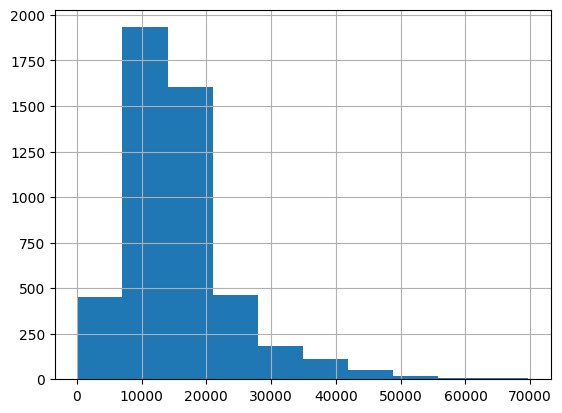

In [ ]:
#verificamos histograma
df_bmw1['precio'].hist()

In [ ]:
#miramos cuantos coches hay más altos de 300 CV
df_bmw1[df_bmw1['potencia'] > 300]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
67,M3,29925.0,309.0,NaT,petrol,silver,NaN,True,True,False,NaN,True,True,True,True,47000.0,2018-04-01
72,M4,69410.0,317.0,2015-02-01,petrol,white,NaN,True,True,False,NaN,False,True,True,True,53600.0,2018-03-01
73,M3,170550.0,309.0,NaT,petrol,grey,coupe,True,True,False,NaN,True,False,True,True,28000.0,2018-03-01
93,M3,99283.0,309.0,NaT,petrol,silver,NaN,False,False,False,NaN,True,False,True,True,28600.0,2018-04-01
139,M3,169970.0,309.0,2011-03-01,petrol,grey,coupe,True,True,False,NaN,True,False,True,True,35700.0,2018-08-01
2944,M3,33670.0,317.0,2014-03-01,petrol,blue,sedan,True,True,False,NaN,False,True,True,True,51200.0,2018-04-01
3092,M3,39250.0,317.0,2015-11-01,petrol,black,sedan,True,True,False,NaN,False,True,True,True,52400.0,2018-05-01
3601,M5,150187.0,412.0,NaT,petrol,white,sedan,True,True,True,NaN,True,True,True,True,41600.0,2018-09-01


In [ ]:
#los borramos
df_bmw1=df_bmw1[df_bmw1['potencia'] < 300]

<Axes: >

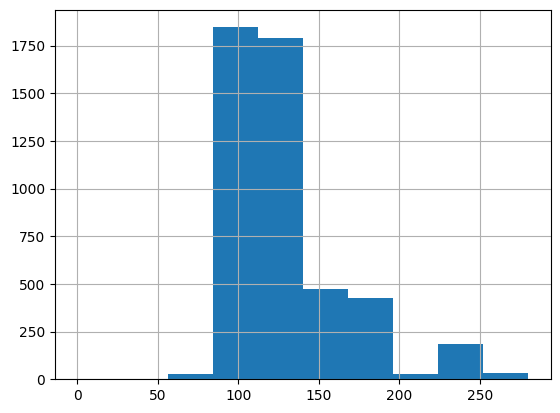

In [ ]:
#verificamos histograma
df_bmw1['potencia'].hist()

In [ ]:
#miramos cuantos coches hay más altos de 400000 km
df_bmw1[df_bmw1['km'] > 400000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
557,520,484615.0,120.0,2011-02-01,diesel,blue,estate,True,True,False,NaN,False,NaN,True,False,8300.0,2018-03-01
1573,320,400654.0,110.0,2006-12-01,diesel,black,estate,False,False,True,NaN,False,False,True,False,1800.0,2018-07-01
2350,318,477571.0,85.0,NaT,diesel,grey,NaN,False,True,False,NaN,False,True,False,False,1200.0,2018-07-01
2829,525,439060.0,105.0,NaT,diesel,silver,NaN,False,False,True,NaN,False,False,True,False,100.0,2018-03-01
3198,320,405816.0,100.0,2000-02-01,diesel,blue,sedan,False,False,False,NaN,False,NaN,True,False,500.0,2018-05-01
3732,118,1000376.0,90.0,2005-03-01,diesel,NaN,NaN,True,False,False,False,False,NaN,True,False,1400.0,2018-06-01


In [ ]:
#los borramos
df_bmw1=df_bmw1[df_bmw1['km'] < 400000]

<Axes: >

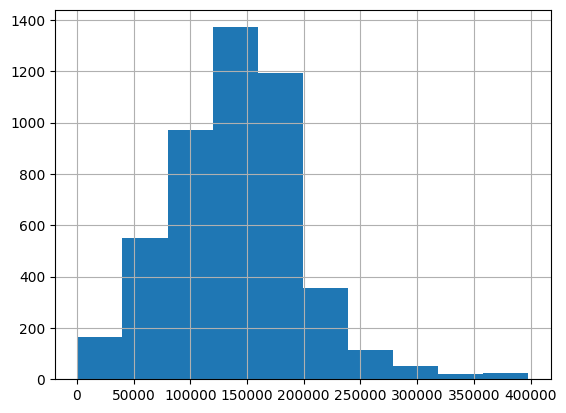

In [ ]:
#verificamos histograma
df_bmw1['km'].hist()

**OUTLAYERS** CATEGORICOS

In [ ]:
#la función hace lo siguiente, crea una lista vacía, hace un conteo de los valores del dataset, se hace un reset index para que se vuelva un dataset
#luego se recorre el data set y se pregunta si el nuevo dataset que tiene los conteos de los valores es menor al umbral, en caso sea así se agrega en una lista
def obten_lista_eliminar(dataset, columna, umbral):
  lista_borrar= []
  tabla=dataset[columna].value_counts().reset_index()
  for i in range(len(tabla)):
    if (tabla.iloc[i][columna]) < umbral:
      lista_borrar.append(tabla.iloc[i]["index"])
  return lista_borrar

In [ ]:
def eliminar_lista_df(dataset, columna, lista_eliminar):
  dataset.drop(dataset[dataset[columna].isin(lista_eliminar)].index, inplace=True)

In [ ]:
df_bmw2 = df_bmw1.copy()

In [ ]:
lista_eliminar_modelo = obten_lista_eliminar(df_bmw2, "modelo", 10)

In [ ]:
eliminar_lista_df(df_bmw2,"modelo",lista_eliminar_modelo)

In [ ]:
df_bmw1.shape

(4812, 17)

In [ ]:
df_bmw2.shape

(4673, 17)

In [ ]:
lista_eliminar_tipo_gasolina = obten_lista_eliminar(df_bmw2, "tipo_gasolina", 20)

['Diesel', 'hybrid_petrol']


In [ ]:
eliminar_lista_df(df_bmw2,"tipo_gasolina",lista_eliminar_tipo_gasolina)

In [ ]:
df_bmw2.shape

(4673, 17)

In [ ]:
lista_colores_minoritarios = obten_lista_eliminar(df_bmw2, "color", 50)
lista_colores_minoritarios

['red', 'beige', 'green', 'orange']

In [ ]:
#reseteamos los índides
df_bmw2.reset_index(drop=True, inplace=True)

In [ ]:
#ponemos los colores minoritarios como otros
def sustituir_valores(dataset,lista,columna,valor):
  lista_sustituidos=[]
  for i in range(len(dataset)):
    if df_bmw2.loc[i,columna] in lista:
        df_bmw2.loc[i,columna]=valor
        lista_sustituidos
  return lista_sustituidos

In [ ]:
valores_sustituidos=sustituir_valores(df_bmw2,lista_colores_minoritarios,"color","otros")

In [ ]:
print(df_bmw2["color"].value_counts())

black     1446
grey      1030
blue       619
white      464
brown      300
silver     280
otros       95
Name: color, dtype: int64


In [ ]:
#lo mismo hacemos con tipo de coche
lista_tipos_minoritarios = obten_lista_eliminar(df_bmw2, "tipo_coche", 80)


['subcompact', 'coupe', 'convertible', 'van']


In [ ]:
valores_sustituidos=sustituir_valores(df_bmw2,lista_tipos_minoritarios,"tipo_coche","otros")

In [ ]:
print(df_bmw2["tipo_coche"].value_counts())

estate       1089
sedan         804
suv           740
hatchback     458
otros         161
Name: tipo_coche, dtype: int64


# **NULOS**

In [ ]:
#miramos nulos
df_bmw2.isnull().sum()

modelo                            3
km                                0
potencia                          0
fecha_registro                 2340
tipo_gasolina                     5
color                           432
tipo_coche                     1415
volante_regulable                 4
aire_acondicionado              464
camara_trasera                    2
asientos_traseros_plegables    3286
elevalunas_electrico              1
bluetooth                       704
gps                               0
alerta_lim_velocidad            704
precio                            0
fecha_venta                       1
dtype: int64

In [ ]:
#Borramos la fecha de registro ya que consideramos que no va a ser importante para el cálculo del precio
del df_bmw2['fecha_registro']

In [ ]:
df_bmw2.shape

(4666, 16)

In [ ]:
# al tener 4666 registros consideramos que se pueden borrar los registros que tengan menos de un 5% (25 registros) a nulo
columnas=df_bmw2.columns.tolist()
columnas_nulas=[]
for columna in columnas:
  if df_bmw2[columna].isnull().sum() < 25 and df_bmw2[columna].isnull().sum() != 0:
    columnas_nulas.append(columna)
    df_bmw2.dropna(subset=[columna], inplace=True)

In [ ]:
df_bmw2.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2332
tipo_gasolina                     0
color                           431
tipo_coche                     1407
volante_regulable                 0
aire_acondicionado              461
camara_trasera                    0
asientos_traseros_plegables    3273
elevalunas_electrico              0
bluetooth                       701
gps                               0
alerta_lim_velocidad            701
precio                            0
fecha_venta                       0
dtype: int64

In [ ]:
#copiamos dataframe:
df_bmw3 = df_bmw2.copy()


In [ ]:
#Vemos que valores tienen las categógicas nulas
columnas=df_bmw3.columns.tolist()
columnas_nulas=[]
for columna in columnas:
  if df_bmw3[columna].isnull().sum() > 0:
    columnas_nulas.append(columna)
    print(df_bmw3[columna].unique())
columnas_nulas

['2012-02-01T00:00:00.000000000' '2012-04-01T00:00:00.000000000'
                           'NaT' '2009-08-01T00:00:00.000000000'
 '2014-03-01T00:00:00.000000000' '2015-08-01T00:00:00.000000000'
 '2009-01-01T00:00:00.000000000' '2008-04-01T00:00:00.000000000'
 '2009-05-01T00:00:00.000000000' '2014-10-01T00:00:00.000000000'
 '1995-10-01T00:00:00.000000000' '2014-04-01T00:00:00.000000000'
 '2016-03-01T00:00:00.000000000' '2008-07-01T00:00:00.000000000'
 '2001-09-01T00:00:00.000000000' '2014-05-01T00:00:00.000000000'
 '2012-05-01T00:00:00.000000000' '2008-03-01T00:00:00.000000000'
 '2014-01-01T00:00:00.000000000' '2016-07-01T00:00:00.000000000'
 '2004-07-01T00:00:00.000000000' '2013-11-01T00:00:00.000000000'
 '2014-11-01T00:00:00.000000000' '2011-03-01T00:00:00.000000000'
 '2014-08-01T00:00:00.000000000' '2014-02-01T00:00:00.000000000'
 '2007-07-01T00:00:00.000000000' '2011-12-01T00:00:00.000000000'
 '2014-07-01T00:00:00.000000000' '2015-03-01T00:00:00.000000000'
 '2016-01-01T00:00:00.000

['fecha_registro',
 'color',
 'tipo_coche',
 'aire_acondicionado',
 'asientos_traseros_plegables',
 'bluetooth',
 'alerta_lim_velocidad']

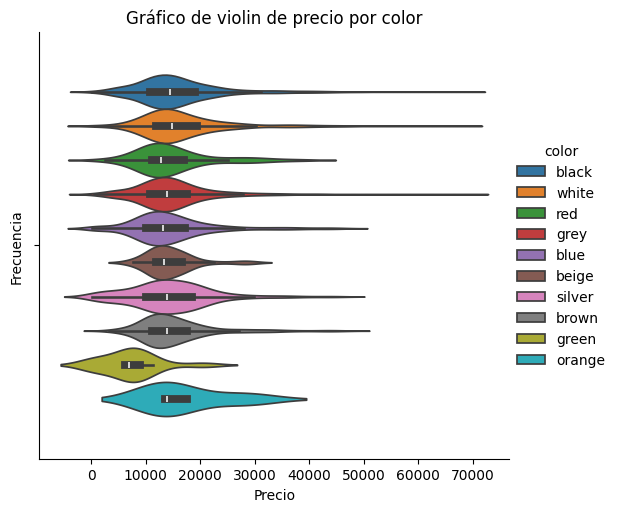

In [ ]:
#Mramos si el precio depende del color, y vemos que en el grueso de vehículos no pasa
sns.catplot(x = "precio", data= df_bmw3, kind="violin", hue="color")
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Gráfico de violin de precio por color')
plt.show()

In [ ]:
 #decicimos poner una nueva categoria
 df_bmw3['color'].fillna('Desconocido', inplace=True)

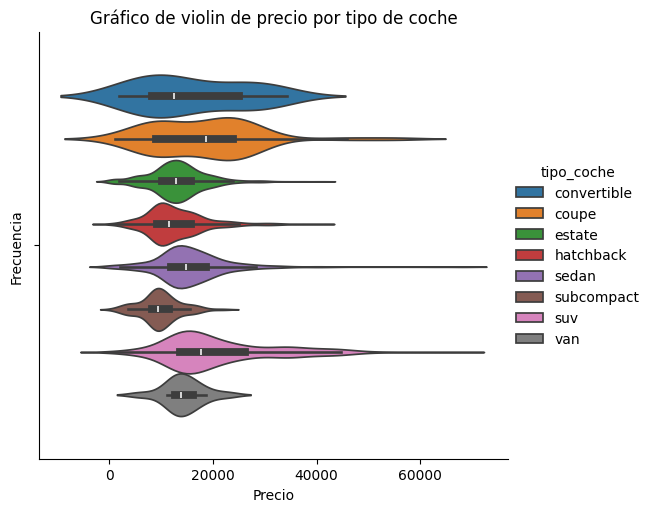

In [ ]:
#Verificamos si pasa lo mismo con el tipo de coche
sns.catplot(x = "precio", data= df_bmw3, kind="violin", hue="tipo_coche")
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Gráfico de violin de precio por tipo de coche')
plt.show()


In [ ]:
#En este caso el precio si puede llegar a depender bastante, de momento lo dejamos así, vamos a intetnar dsiminuir registros por camposa nul simultaneamente

In [ ]:
#empezamos por 5
df_bmw3[df_bmw3['tipo_coche'].isnull() & df_bmw3['aire_acondicionado'].isnull() & df_bmw3['asientos_traseros_plegables'].isnull() & df_bmw3['alerta_lim_velocidad'].isnull() & df_bmw3['bluetooth'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [ ]:
len(df_bmw3)

4657

In [ ]:
#Borramos combinatoria de columnas de 4 valores nulos
combinaciones = list(combinations(columnas_nulas, 4))
for combinacion in combinaciones:
    indices_eliminar=df_bmw3[df_bmw3[combinacion[0]].isnull() &  df_bmw3[combinacion[1]].isnull() &  df_bmw3[combinacion[2]].isnull() &  df_bmw3[combinacion[3]].isnull()].index
    df_bmw3.drop(indices_eliminar,inplace=True)

In [ ]:
len(df_bmw3)

4403

In [ ]:
#Borramos combinatoria de columnas de 3 valores nulos
from itertools import combinations
combinaciones = list(combinations(columnas_nulas, 3))
for combinacion in combinaciones:
    indices_eliminar=df_bmw3[df_bmw3[combinacion[0]].isnull() &  df_bmw3[combinacion[1]].isnull() &  df_bmw3[combinacion[2]].isnull()].index
    df_bmw3.drop(indices_eliminar,inplace=True)

In [ ]:
len(df_bmw3)

3445

In [ ]:
#volvemos a hacer recuento
df_bmw2.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2332
tipo_gasolina                     0
color                           431
tipo_coche                     1407
volante_regulable                 0
aire_acondicionado              461
camara_trasera                    0
asientos_traseros_plegables    3273
elevalunas_electrico              0
bluetooth                       701
gps                               0
alerta_lim_velocidad            701
precio                            0
fecha_venta                       0
dtype: int64

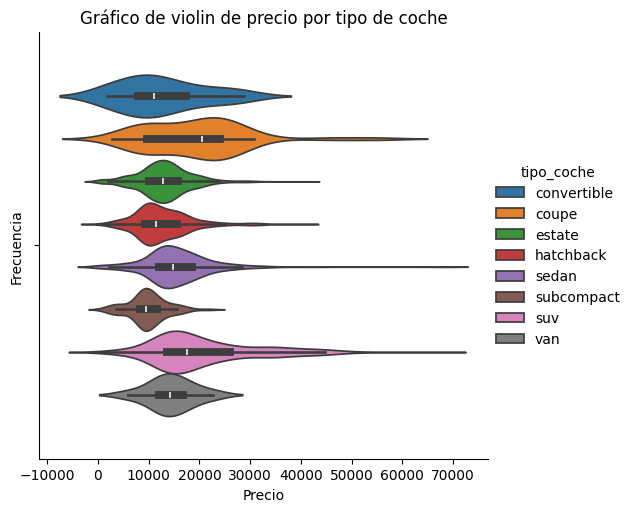

In [ ]:
#Verificamos si pasa lo mismo con el tipo de coche
sns.catplot(x = "precio", data= df_bmw3, kind="violin", hue="tipo_coche")
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Gráfico de violin de precio por tipo de coche')
plt.show()

In [ ]:
#visto que no podemos sacar conclusiones y son muchos registros categorizamos los que faltan a desconocido
df_bmw3['tipo_coche'].fillna('Desconocido', inplace=True)

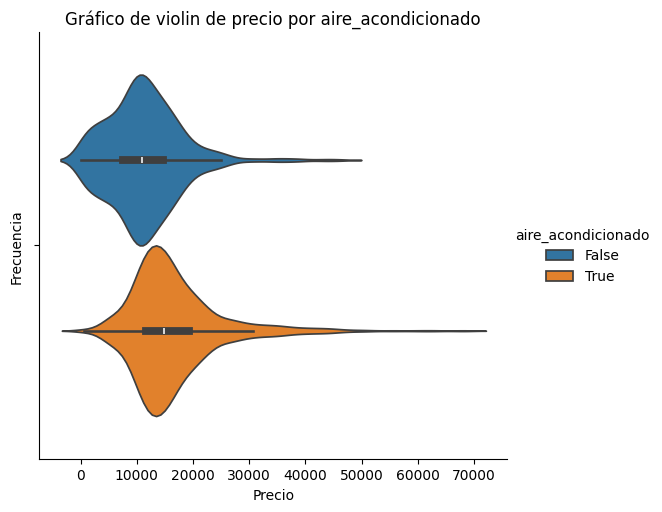

In [ ]:
#Miramos el aire aconidiconado
#Verificamos si pasa lo mismo con el tipo de coche
sns.catplot(x = "precio", data= df_bmw3, kind="violin", hue="aire_acondicionado")
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Gráfico de violin de precio por aire_acondicionado')
plt.show()

In [ ]:
#vemos ua ligera tendencia a que los coches con aire acondicionado sean más caros, la posibilidad de que los coches con aire acondionado cuesten menos de 8000€ es muy baja, vamos a verificarlo
df_bmw_ac_true = [df_bmw3["aire_acondicionado"]==True]

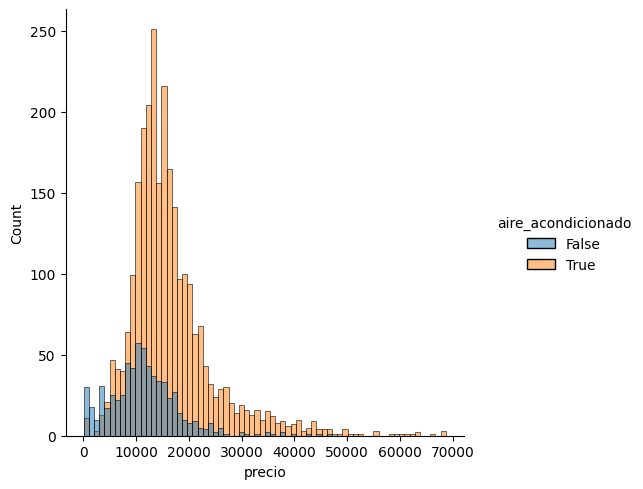

In [ ]:
sns.displot(df_bmw3, x = "precio", hue = 'aire_acondicionado')

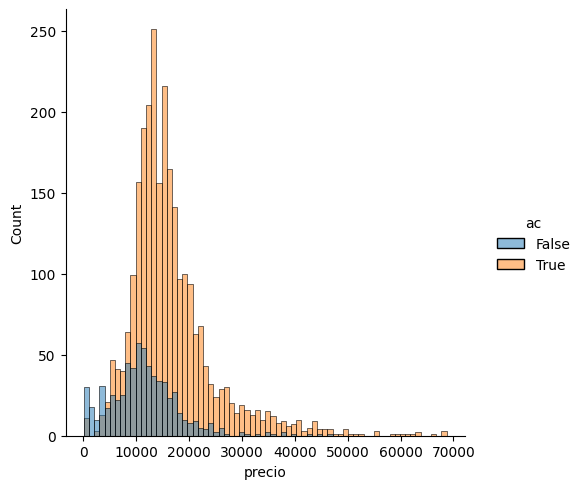

In [ ]:
lista1=df_bmw3["precio"].tolist()
lista2= df_bmw3["aire_acondicionado"].tolist()

df_prova = pd.DataFrame({'precio':lista1,'ac':lista2})
df_prova.dropna(inplace=True)
sns.displot(df_prova, x = "precio", hue = 'ac')

In [ ]:
grouped_data = df_prova.groupby("precio")

In [ ]:
stats = grouped_data["ac"].describe()
stats

,count,unique,top,freq
precio,,,,
100.0,4,2,True,3
200.0,1,1,False,1
400.0,3,1,False,3
600.0,1,1,True,1
700.0,2,1,False,2
...,...,...,...,...
63100.0,1,1,True,1
63700.0,1,1,True,1
66600.0,1,1,True,1


from matplotlib import pyplot as plt
import seaborn as sns
stats.groupby('unique').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
stats.groupby('top').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['top'].value_counts()
    for x_label, grp in stats.groupby('unique')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('unique')
_ = plt.ylabel('top')

In [ ]:
df_prova_nuls = df_bmw3[df_bmw3["aire_acondicionado"].isnull()]
df_prova_nuls

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
79,320,260217.0,120.0,NaT,diesel,grey,coupe,True,NaN,False,False,True,True,True,True,8500.0,2018-06-01
83,420,140694.0,120.0,2013-10-01,diesel,black,coupe,True,NaN,False,False,True,NaN,True,False,18300.0,2018-07-01
112,318,203950.0,105.0,2014-06-01,diesel,white,estate,False,NaN,False,False,False,False,True,True,7900.0,2018-04-01
113,316,158002.0,85.0,2014-06-01,diesel,white,estate,False,NaN,False,False,False,False,True,False,8900.0,2018-04-01
205,316,201102.0,85.0,2013-12-01,diesel,black,estate,True,NaN,False,NaN,False,False,True,False,8800.0,2008-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4513,X1,169294.0,135.0,2014-05-01,diesel,white,suv,True,NaN,False,NaN,True,False,True,True,14800.0,2018-08-01
4514,X3,205803.0,135.0,NaT,diesel,black,suv,False,NaN,False,False,True,False,True,True,22200.0,2018-08-01
4573,X3,244355.0,110.0,2005-09-01,diesel,black,suv,True,NaN,True,True,True,True,True,False,6600.0,2018-08-01
4600,X1,183147.0,105.0,2014-02-01,diesel,black,suv,False,NaN,False,NaN,False,False,True,True,13700.0,2018-08-01


In [ ]:
df_bmw3['aire_acondicionado'].fillna('Desconocido', inplace=True)

In [ ]:
df_bmw3['asientos_traseros_plegables'].fillna('Desconocido', inplace=True)

In [ ]:
df_bmw3['bluetooth'].fillna('Desconocido', inplace=True)

In [ ]:
df_bmw3['alerta_lim_velocidad'].fillna('Desconocido', inplace=True)

In [ ]:
#volvemos a hacer recuento
df_bmw2.isnull().sum()

modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
log_precio                     0
dtype: int64

In [ ]:
df_bmw2.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,log_precio
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,Desconocido,False,True,True,True,69700.0,2018-02-01,4.843233
2,320,183297.0,120.0,diesel,white,Desconocido,False,False,False,Desconocido,True,False,True,False,10200.0,2018-02-01,4.008600
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,Desconocido,True,True,True,Desconocido,25100.0,2018-02-01,4.399674
4,425,97097.0,160.0,diesel,silver,Desconocido,True,True,False,False,False,True,True,True,33400.0,2018-04-01,4.523746
5,335,152352.0,225.0,petrol,black,Desconocido,True,True,False,False,True,True,True,True,17100.0,2018-02-01,4.232996
